In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

In [5]:
#Como trabajamos con Visual, esta línea imprime los gráficos
%matplotlib inline

In [6]:
df = pd.read_csv("../data/Data_limpia.csv")
df.columns

Index(['company', 'title', 'totalyearlycompensation', 'location',
       'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'Race', 'Education'],
      dtype='object')

## Análisis exploratorio de datos (EDA)

#### Preguntas de exploración

1. Valores que influyen en los salarios de los profesionales
* ¿Cuánto es el salario anual promedio de acuerdo al género?
* ¿Cuánto es el salario anual promedio de acuerdo al nivel de educación?
* ¿Cuánto es el salario anual promedio de acuerdo a la empresa donde se labora?

2. Valores que influyen en el porcentaje de participación de estos profesionales
* ¿Qué % de estos profesionales son de la raza?
* ¿Qué % de las personas que laboran en este rubro cuentan con educación profesional?
* ¿Qué % de estos profesionales cuentan con bachillerato?

#### 1. Valores que ingluyen en los salarios

In [7]:
#Según el género
df_gender = df.groupby('gender').agg({"totalyearlycompensation":"mean", "basesalary":"mean"})
df_gender

,totalyearlycompensation,basesalary
gender,,
Female,177846.363345,131656.341113
Male,181598.575183,131190.914296
No especificado,191181.685414,137063.684421
Other,187568.807339,135576.436548


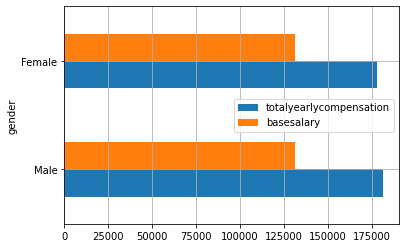

In [8]:
df_gender.loc[['Male','Female']].plot.barh().grid()

In [9]:
#Según el nivel de educación
df_education = df.groupby('Education').agg({"totalyearlycompensation":"mean", "basesalary":"mean"})
df_education

,totalyearlycompensation,basesalary
Education,,
Bachelor's Degree,160026.257191,119645.759881
Highschool,162334.586466,119766.917293
Master's Degree,189512.099260,136922.216961
No especificado,189396.681664,135664.564739
PhD,229413.765823,156674.841772
Some College,174010.676157,129825.622776


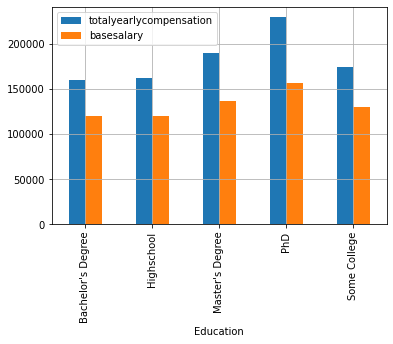

In [31]:
df_education.iloc[[0,1,2,4,5]].plot.bar().grid()

In [51]:
#Según la empresa
df_empresa = df.groupby('company').agg({"totalyearlycompensation":"mean", "basesalary":"mean"})
top_15_empresa = df_empresa.sort_values(by=['totalyearlycompensation'],ascending = False).head(15)

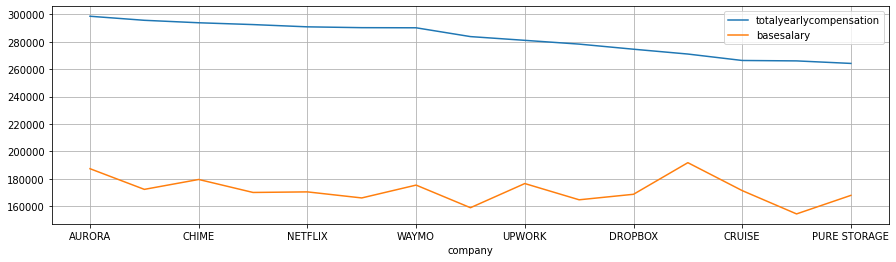

In [50]:
#Top 15 de empresas que más pagan en este rubro
top_15_empresa.plot.line(figsize = (15, 4)).grid()

#### 2. Valores que influyen en el porcentaje de participación de estos profesionales

In [13]:
#Por raza
x_raza = df['Race'].value_counts()
x_raza

No especificado    33447
Asian               9975
White               6701
Hispanic             982
Two Or More          691
Black                618
Name: Race, dtype: int64

<AxesSubplot:ylabel='Race'>

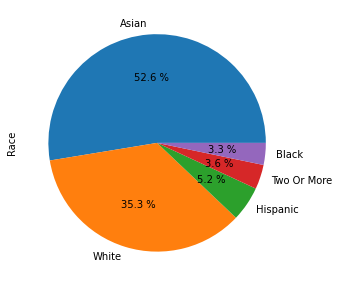

In [52]:
x_raza.iloc[1:6].plot.pie(autopct="%0.1f %%", figsize = (10,5))

In [15]:
#Por educación
x_education = df['Education'].value_counts()
x_education

No especificado      26849
Master's Degree      12976
Bachelor's Degree    10778
PhD                   1264
Some College           281
Highschool             266
Name: Education, dtype: int64

<AxesSubplot:>

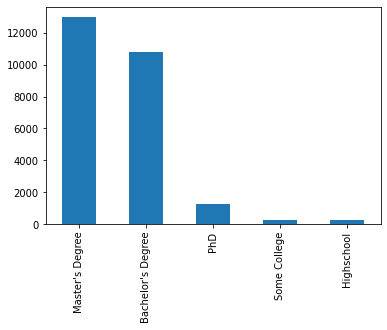

In [16]:
x_education.iloc[1:6].plot.bar()

<AxesSubplot:ylabel='Education'>

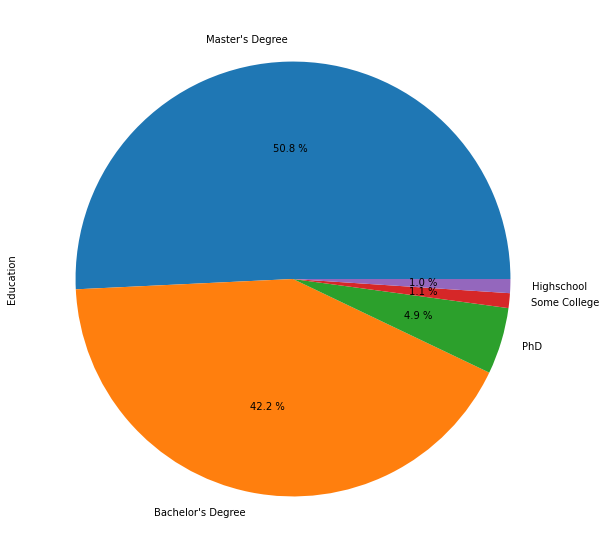

In [38]:
x_education.iloc[1:6].plot.pie(autopct="%0.1f %%", figsize = (10, 10))

In [49]:
pd.DataFrame(df.location.unique()).value_counts

<bound method DataFrame.value_counts of                                0
0               Redwood City, CA
1              San Francisco, CA
2                    Seattle, WA
3              Mountain View, CA
4                    Redmond, WA
..                           ...
967                 New City, NY
968     Pasir Ris, SG, Singapore
969  Richmond, VA, United States
970     Ekaterinburg, SV, Russia
971                  Hilbert, WI

[972 rows x 1 columns]>